In [1]:
import json

with open(f'benchmark/test_output.json', 'r') as f:
    output_dict_benchmark = json.loads(f.read())
    
with open(f'output/test_output.json', 'r') as f:
    output_dict = json.loads(f.read())

In [2]:
len(output_dict_benchmark['clean'])

200

In [3]:
len(output_dict['watermark'])

100

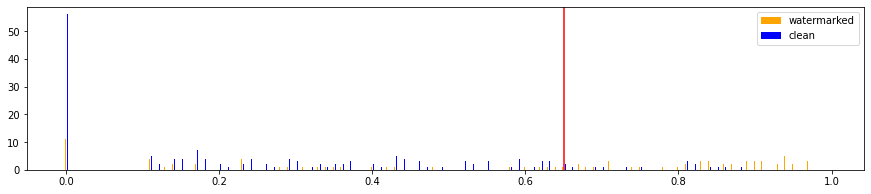

TP:  53
FN:  47
TN:  183
FP:  17
Accuracy:  0.7866666666666666
Weighted Accuracy:  0.7225
TP %:  0.53
TN %:  0.915


In [48]:
import numpy as np
import matplotlib.pyplot as plt

thres = 0.65

# define x axis values, then sum for y axis values clean and watermark
x = np.arange(0.0, 1, 0.01)
watermark_binned_scores = [0 for _ in range(len(x))]
clean_binned_scores = [0 for _ in range(len(x))]

for key in output_dict.keys():
    for i in range(len(output_dict[key])):
        if (output_dict[key][i]):
            idx = round(output_dict[key][i][0] * 100)
        else:
            idx = 0
        if 'watermark' in key:
            watermark_binned_scores[idx] += 1
        else:
            clean_binned_scores[idx] += 1

# plot and show bar chart
plt.figure(figsize=(15, 3))
plt.bar(x-0.001, watermark_binned_scores, width=0.001, color='orange', label='watermarked')
plt.bar(x+0.002, clean_binned_scores, width=0.001, color='blue', label='clean')
plt.axvline(thres, color='red')
plt.legend()
plt.show()

# calculate metrics
TP = sum(watermark_binned_scores[round(thres * 100):])
FN = sum(watermark_binned_scores[:round(thres * 100)])
TN = sum(clean_binned_scores[:round(thres * 100)])
FP = sum(clean_binned_scores[round(thres * 100):])

positives = len(output_dict['watermark'])
negatives = len(output_dict['clean'])

print("TP: ", TP)
print("FN: ", FN)
print("TN: ", TN)
print("FP: ", FP)
print("Accuracy: ", ((TP+TN)/(positives+negatives)))
print("Weighted Accuracy: ", ((TP/positives) + (TN/negatives))/2)
print("TP %: ", TP / positives)
print("TN %: ", TN / negatives)

In [66]:
import numpy as np
import matplotlib.pyplot as plt
    
def optimise(output_dict, thres=0.5):
    # define x axis values, then sum for y axis values clean and watermark
    x = np.arange(0.0, 1, 0.01)
    watermark_binned_scores = [0 for _ in range(len(x))]
    clean_binned_scores = [0 for _ in range(len(x))]

    for key in output_dict.keys():
        for i in range(len(output_dict[key])):
            if (output_dict[key][i]):
                idx = round(output_dict[key][i][0] * 100)
            else:
                idx = 0
            if 'watermark' in key:
                watermark_binned_scores[idx] += 1
            else:
                clean_binned_scores[idx] += 1
                   
    # calculate metrics
    TP = sum(watermark_binned_scores[round(thres * 100):])
    FN = sum(watermark_binned_scores[:round(thres * 100)])
    TN = sum(clean_binned_scores[:round(thres * 100)])
    FP = sum(clean_binned_scores[round(thres * 100):])

    positives = len(output_dict['watermark'])
    negatives = len(output_dict['clean'])

    print("TP: ", TP)
    print("FN: ", FN)
    print("TN: ", TN)
    print("FP: ", FP)
    print("Accuracy: ", ((TP+TN)/(positives+negatives)))
    print("Weighted Accuracy: ", ((TP/positives) + (TN/negatives))/2)
    print("TP %: ", TP / positives)
    print("TN %: ", TN / negatives)
    
    # limit height of true negatives
    max_height = 20
    clean_binned_scores[0] = max_height if clean_binned_scores[0] > max_height else clean_binned_scores[0]
    watermark_binned_scores[0] = max_height if watermark_binned_scores[0] > max_height else watermark_binned_scores[0]
    
    # plot and show bar chart
    plt.figure(figsize=(15, 3))
    plt.bar(x-0.001, watermark_binned_scores, width=0.001, color='orange', label='watermarked')
    plt.bar(x+0.002, clean_binned_scores, width=0.001, color='blue', label='clean')
    plt.axvline(thres, color='red')
    plt.legend()
    plt.show()

TP:  53
FN:  47
TN:  183
FP:  17
Accuracy:  0.7866666666666666
Weighted Accuracy:  0.7225
TP %:  0.53
TN %:  0.915


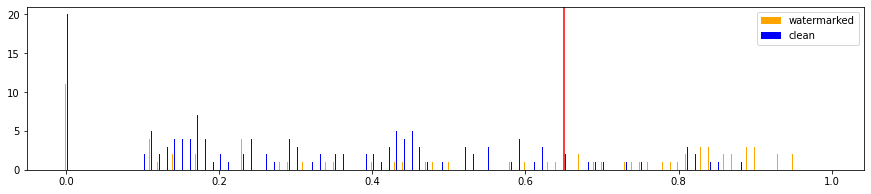

In [75]:
optimise(output_dict, 0.65)

TP:  52
FN:  48
TN:  167
FP:  33
Accuracy:  0.73
Weighted Accuracy:  0.6775
TP %:  0.52
TN %:  0.835


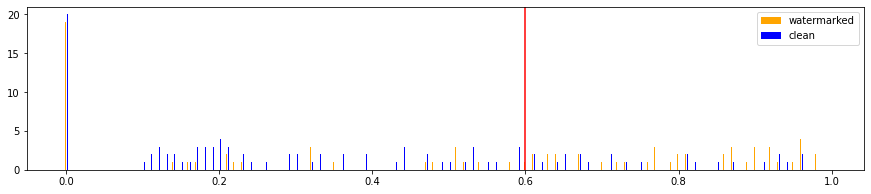

In [76]:
optimise(output_dict_benchmark, 0.6)